In [1]:
import japanize_matplotlib as ja
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

ja.japanize()

In [37]:
def isfloat(s):
    """浮動小数点数値を表しているかどうかを判定
    """
    try:
        float(s)
    except ValueError:
        return False
    else:
        return True

In [38]:
def uniform_float(x):
    """Convert the string of a numeric value to a float value.

    >>> uniform_float("1,234")
    1234.0
    """
    if (type(x) is str):
        y = x.replace(',', '')
        if (isfloat(y)):
            x = float(y)
    return x

In [103]:
def analyze_stock(code, y_axis, filepath):
    """Return the standard price of stock indecated code according to a linear regression.
    
    >>> analyze_stock(9522, "EPS", "stocklist.csv")
    436
    """
    X_AXIS = "取引値"
    COL_MARKET = "市場"
    COL_COMPANY = "名称・コード・市場"

    # 列を必要最小限に絞り、NaNレコードを除去
    df_entire = pd.read_csv(filepath, index_col=0)
    num_cols = [X_AXIS, y_axis]
    all_cols = [COL_MARKET, COL_COMPANY] + num_cols    
    df = df_entire[all_cols]    
    df = df.dropna(subset=all_cols)
    df = df[all_cols].applymap(uniform_float)

    # 検証1銘柄を抜き出す
    df_one = df.loc[code]

    # 母数を検証銘柄と同じ市場に絞る
    df = df.loc[df[COL_MARKET] == df_one.loc[COL_MARKET]]

    # 1000円単位でプロット上限値を絞る
    max_price = math.floor(df_one[X_AXIS] / 1000) * 1000 + 1000
    df = df[(df[X_AXIS] < max_price)]

    # 検証にノイズデータを除去
    #if (y_axis == "PER"):
    #    df = df[(df[y_axis] < 1000)]
    #if (y_axia == "PBR"):
    #    df = df[(df[y_axis] < 100)]

    # 描画向けにx/y要素を準備
    x_all = df[[X_AXIS]]
    y_all = df[[y_axis]]
    x_one = df_one[[X_AXIS]]
    y_one = df_one[[y_axis]]
    
    # 散布図(全体)
    plt.scatter(x_all, y_all, color='royalblue', s=10)

    # 回帰直線
    x_allnum = np.array(x_all)
    model = LinearRegression()
    model.fit(x_all, y_all)
    y_regression = model.predict(x_all)
    plt.plot(x_allnum, y_regression, color='darkorange')
    
    # 散布図(標的)
    plt.scatter(x_one, y_one, color='red')

    title = "%s : %d : %s" % (df_one.loc[COL_MARKET], code, df_one.loc[COL_COMPANY])
    plt.title(title)
    plt.xlabel(X_AXIS)
    plt.ylabel(y_axis)
    plt.grid()
    plt.show()

    # 回帰線上から標準株価を取得
    standard_y = df_one[y_axis]
    standard_price = int(((standard_y - model.intercept_) / model.coef_)[0])
    current_price = df_one[X_AXIS]
    standard_stat = "標準価格 %d 円 - 現在価格 %d 円 = 伸びしろ %d 円" % (standard_price, current_price, (standard_price - current_price))
    print(standard_stat)

    return standard_price


In [104]:
filepath = '【株式分析】②株式銘柄スクリーニング - ★分析★.csv'
y_axias = ['EPS', '当期利益(百万)', 'PER', 'PBR', 'ROE', 'ROA']

In [110]:
CODE = 9522
standard_prices = []

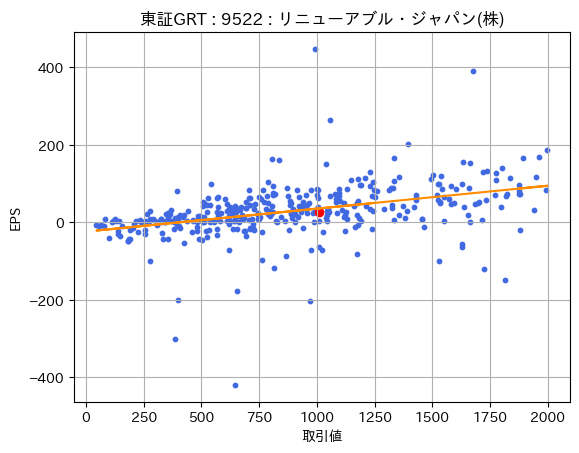

標準価格 834 円 - 現在価格 1011 円 = 伸びしろ -177 円


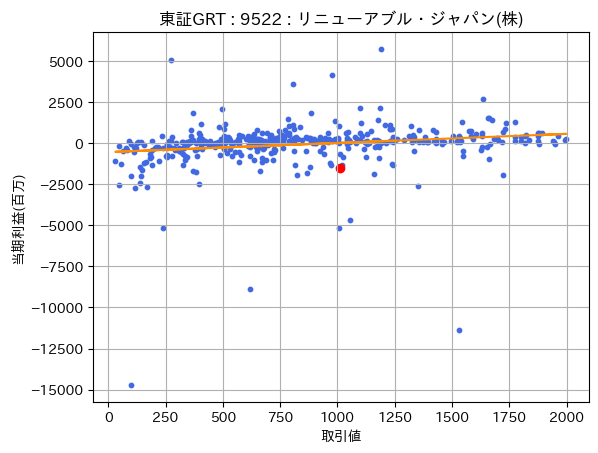

標準価格 -1763 円 - 現在価格 1011 円 = 伸びしろ -2774 円


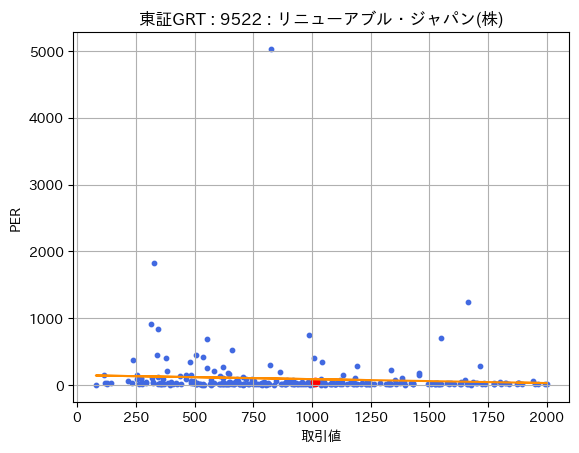

標準価格 1728 円 - 現在価格 1011 円 = 伸びしろ 717 円


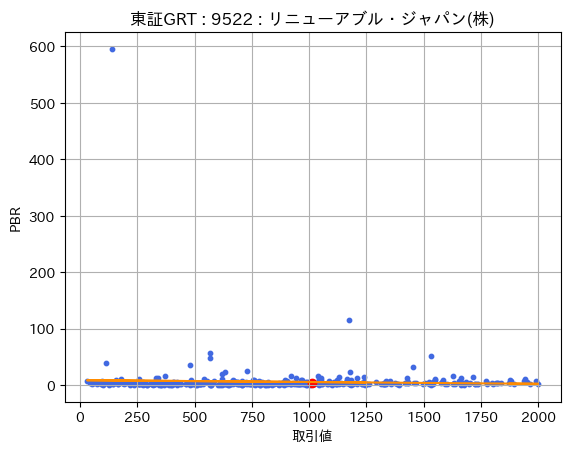

標準価格 1676 円 - 現在価格 1011 円 = 伸びしろ 665 円


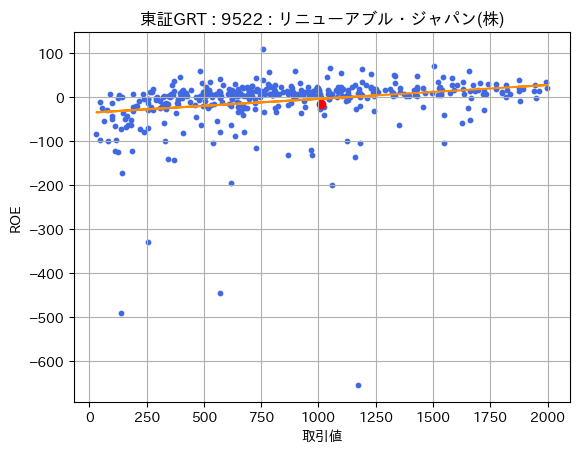

標準価格 631 円 - 現在価格 1011 円 = 伸びしろ -380 円


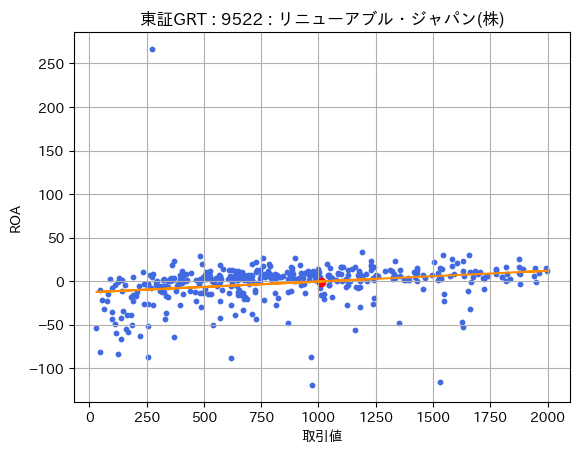

標準価格 945 円 - 現在価格 1011 円 = 伸びしろ -66 円

各要素の標準価格より: 平均価格=[675 円], 中央価格=[889 円]


In [111]:
for y_axia in y_axias:
    standard_prices += [analyze_stock(CODE, y_axia, filepath)]

standard_prices = np.array(standard_prices)
print("\n各要素の標準価格より: 平均価格=[%d 円], 中央価格=[%d 円]" % (np.average(standard_prices), np.median(standard_prices)))